In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pandas import DataFrame

The function cosine_similarity helps in finding the similarity between movies of our interest.

CountVectorizer - Used to convert text into matrix type format

In [176]:
credits_df = pd.read_csv(r"C:\Users\sriram\Downloads\credits.csv")
movies_df = pd.read_csv( r"C:\Users\sriram\Downloads\movies_metadata.csv")

C:\Users\sriram\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [177]:
credits_df.head()

,cast,crew,id,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1686,Unnamed: 1687,Unnamed: 1688,Unnamed: 1689,Unnamed: 1690,Unnamed: 1691,Unnamed: 1692,Unnamed: 1693,Unnamed: 1694,Unnamed: 1695
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30-10-95,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15-12-95,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,22-12-95,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,22-12-95,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,10-02-95,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [179]:
credits_df = pd.DataFrame(credits_df)

In [180]:
df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-09,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


# IMDB Formula Calculation

Here we utilise the weighted average formula

Weighted Rating Formula = (v/(v+m))*R + (m/(v+m))*C

Here v refers to number of votes for a movie 

m refers to the minimum number of votes required to make it eligible for voting.

R is the average of the movie

C refers to the average rating of the movies listed

In [181]:
C = df_movies['vote_average'].mean()
m = df_movies['vote_count'].quantile(0.9)

In [182]:
C # the average rating of movies

6.092171559442011

In [183]:
m # min no of votes required

1838.4000000000015

In [184]:
qualified_movies = df_movies[df_movies['vote_count'] >= m]

In [185]:
movies_df.loc[:,["original_title","budget"]] 

,original_title,budget
0,Toy Story,30000000
1,Jumanji,65000000
2,Grumpier Old Men,0
3,Waiting to Exhale,16000000
4,Father of the Bride Part II,0
5,Heat,60000000
6,Sabrina,58000000
7,Tom and Huck,0
8,Sudden Death,35000000
9,GoldenEye,58000000


In [186]:
qualified_movies.shape

(481, 20)

In [187]:
def weighted_rating(movie , C=C , m=m ):
    v = movie['vote_count']
    R = movie['vote_average']
    
    return (v/(v+m)*R) + (m/(v+m)*C)
    

In [188]:
score_col = qualified_movies.apply(weighted_rating, axis=1).to_frame()

to_frame: is used as a function in order to convert the series object to a dataframe

In [189]:
score_col

,0
0,7.050669
1,6.665696
2,6.239396
3,7.346721
4,6.096368
5,5.965250
6,6.934805
7,7.041968
8,7.062856
9,5.781535


In [190]:
qualified_movies = qualified_movies.assign(score = score_col.values)

In [191]:
qualified_movies = qualified_movies.sort_values('score' , ascending = False)

In [192]:
qualified_movies.shape

(481, 21)

In [193]:
qualified_movies[['title' , 'vote_count','score','budget']].head(15)

,title,vote_count,score,budget
1881,The Shawshank Redemption,8205,8.059258,25000000
662,Fight Club,9413,7.939256,63000000
65,The Dark Knight,12002,7.920020,185000000
3232,Pulp Fiction,8428,7.904645,8000000
96,Inception,13752,7.863239,160000000
3337,The Godfather,5893,7.851236,6000000
95,Interstellar,10867,7.809479,165000000
809,Forrest Gump,7927,7.803188,55000000
329,The Lord of the Rings: The Return of the King,8064,7.727243,94000000
1990,The Empire Strikes Back,5879,7.697884,18000000


In [194]:
popular_movies = df_movies.sort_values('popularity' , ascending =False)

In [195]:
popular_movies.head(15)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",17-06-15,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",05-11-14,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-02-16,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",30-07-14,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",13-05-15,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-15,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
199,140000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneyvideos/liveaction/p...,22,"[{""id"": 911, ""name"": ""exotic island""}, {""id"": ...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-07-03,655011224,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985
82,170000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.dawnofapes.co

Text(0.5, 1.0, 'Popular Movies')

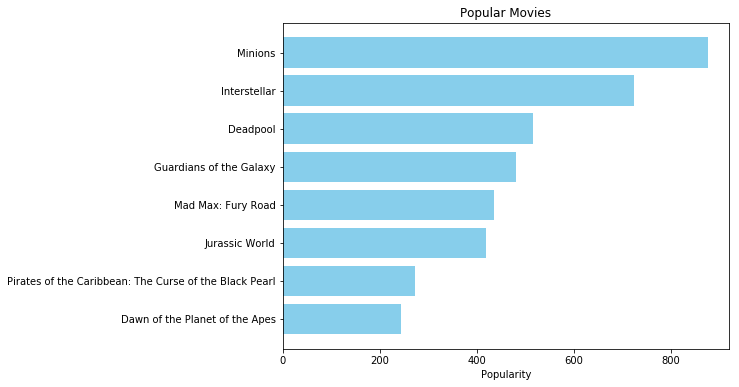

In [196]:
popular_movies = df_movies.sort_values('popularity' , ascending =False)
plt.figure(figsize=(8,6))

plt.barh(popular_movies['title'].head(8) , popular_movies['popularity'].head(8) , align ='center',color = 'skyblue')
plt.gca().invert_yaxis() # gca refers to get current axis

plt.xlabel('Popularity')
#plt.ylabel('Title of the movie')
plt.title('Popular Movies')

# Content Based Filtering

In [198]:
df_movies['overview'] = df_movies['overview'].fillna('')

In [199]:
df_movies.shape

(4803, 20)

We will construct the required TF-IDF matrix by fitting and transforming the data

In [200]:
tfidf_generator = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_generator.fit_transform(df_movies['overview'])

In [201]:
tfidf_matrix.shape

(4803, 20978)

In [204]:
content_similarity = linear_kernel(tfidf_matrix , tfidf_matrix)
movies_indexed_title = pd.Series(df_movies.index, index = df_movies['title']).drop_duplicates()

In [228]:
movies_indexed_title

title
Avatar                                            0
Pirates of the Caribbean: At World's End          1
Spectre                                           2
The Dark Knight Rises                             3
John Carter                                       4
Spider-Man 3                                      5
Tangled                                           6
Avengers: Age of Ultron                           7
Harry Potter and the Half-Blood Prince            8
Batman v Superman: Dawn of Justice                9
Superman Returns                                 10
Quantum of Solace                                11
Pirates of the Caribbean: Dead Man's Chest       12
The Lone Ranger                                  13
Man of Steel                                     14
The Chronicles of Narnia: Prince Caspian         15
The Avengers                                     16
Pirates of the Caribbean: On Stranger Tides      17
Men in Black 3                                   18
The Ho

Let's work on the recommendation list

In [236]:
def get_content_recommendations(movie_title , similarity):
    movie_index = movies_indexed_title[movie_title]
    sim_scores = list(enumerate(similarity[movie_index]))
    sim_scores = sorted(sim_scores , key = lambda x : x[1] , reverse = True)
    sim_scores = sim_scores[1:11]
    
    movie_indices = [score[0] for score in sim_scores]
    
    return df_movies['title'].iloc[movie_indices]

    

Here we observe in getting the indexes of movies with highest similarity with movie given to the function

In [238]:
get_content_recommendations('Spectre' , content_similarity)

1343    Never Say Never Again
4071    From Russia with Love
3162              Thunderball
1717               Safe Haven
11          Quantum of Solace
4339                   Dr. No
29                    Skyfall
1880              Dance Flick
3336     Diamonds Are Forever
1743                Octopussy
Name: title, dtype: object

In [241]:
get_content_recommendations('The Dark Knight Rises' , content_similarity)

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [244]:
df_movies['genres'][2]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'